In [108]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage import io, transform, color
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.models as models
from torchmetrics.image import StructuralSimilarityIndexMeasure


np.random.seed(1)


In [109]:
class ColorizationResNet(nn.Module):
    def __init__(self):
        super(ColorizationResNet
              , self).__init__()

        # Load pretrained ResNet-18
        resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

        # Modify first layer to accept 1-channel input (grayscale L channel)
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False),  # Change input to 1 channel
            resnet.bn1,
            resnet.relu,
            resnet.maxpool,
            resnet.layer1,
            resnet.layer2,
            resnet.layer3,
            resnet.layer4
        )

        # Decoder (More upsampling layers to restore 256x256)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),  # 8x8 → 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 16x16 → 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # 32x32 → 64x64
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),    # 64x64 → 128x128
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),    # 128x128 → 256x256
            nn.ReLU(),
            nn.Conv2d(16, 2, kernel_size=1),  # Output 2-channel (ab)
            nn.Tanh()  # Normalize to [-1, 1]
        )

    def forward(self, input_l):
        x = self.encoder(input_l)  # Extract features
        x = self.decoder(x)  # Upsample to (2, 256, 256)
        return x


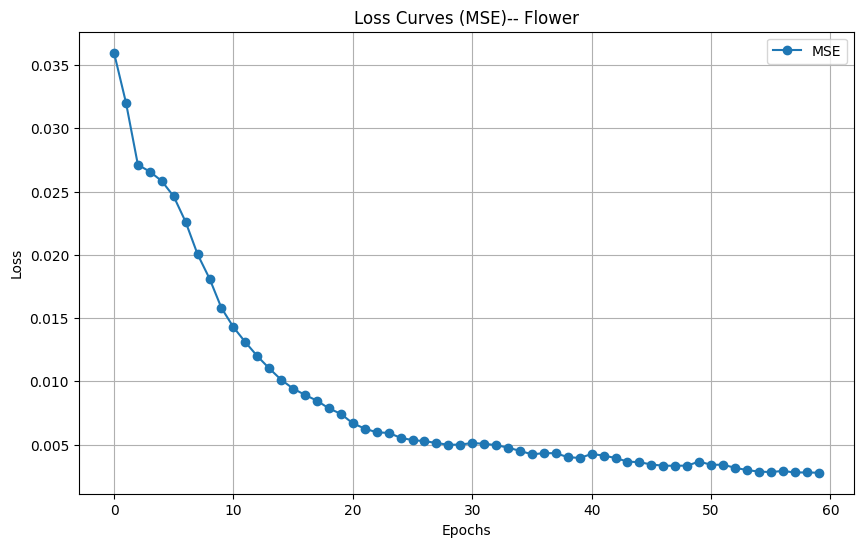

In [116]:
loss = torch.load('flower_mse_60_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='MSE', linestyle='-', marker='o')
plt.title('Loss Curves (MSE)-- Flower')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

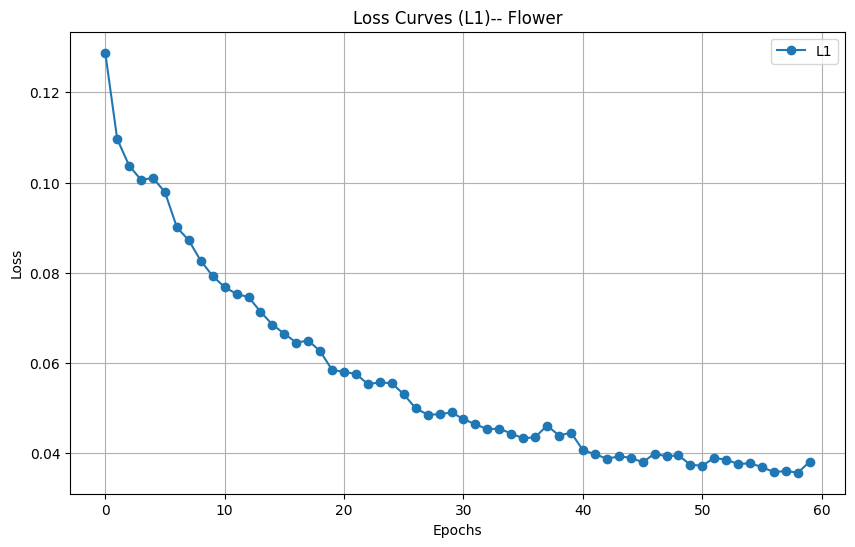

In [117]:
loss = torch.load('flower_l1_60_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='L1', linestyle='-', marker='o')
plt.title('Loss Curves (L1)-- Flower')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

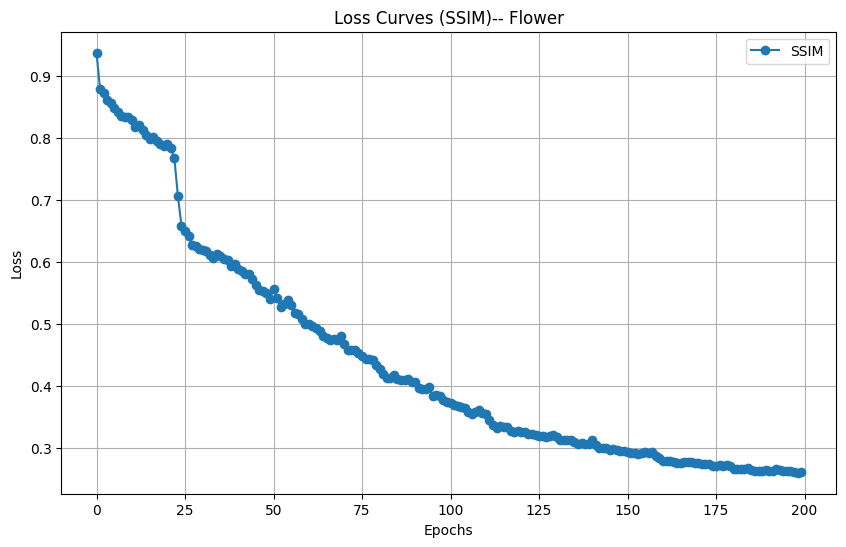

In [118]:
loss = torch.load('flower_ssim_200_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='SSIM', linestyle='-', marker='o')
plt.title('Loss Curves (SSIM)-- Flower')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

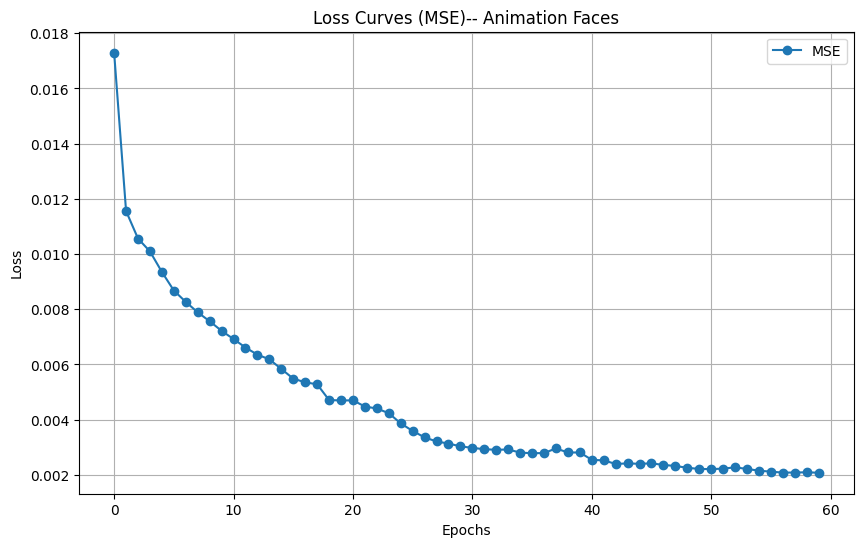

In [119]:
loss = torch.load('aniF_mse_60_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='MSE', linestyle='-', marker='o')
plt.title('Loss Curves (MSE)-- Animation Faces')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

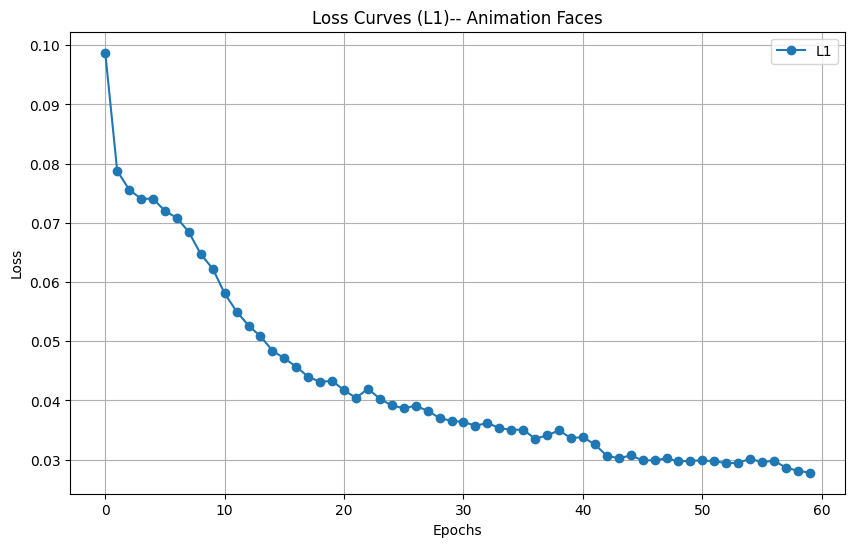

In [120]:
loss = torch.load('aniF_l1_60_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='L1', linestyle='-', marker='o')
plt.title('Loss Curves (L1)-- Animation Faces')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

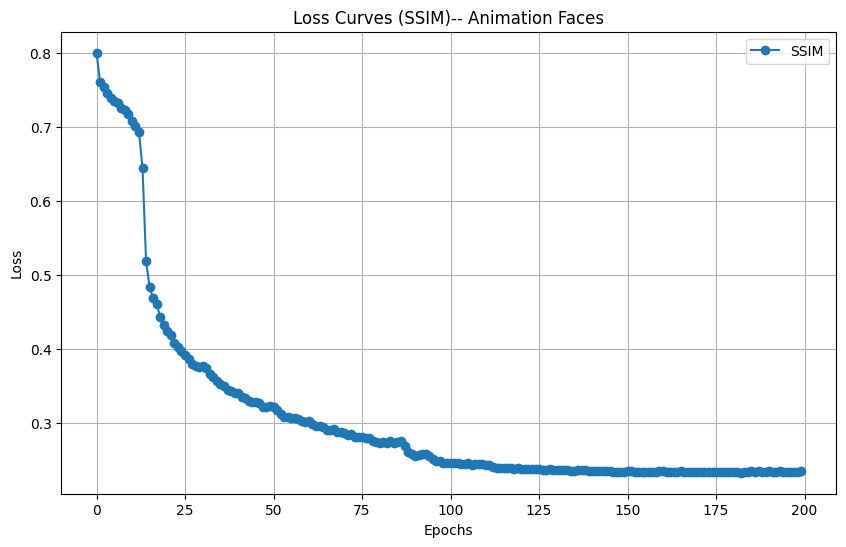

In [121]:
loss = torch.load('aniF_ssim_200_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='SSIM', linestyle='-', marker='o')
plt.title('Loss Curves (SSIM)-- Animation Faces')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

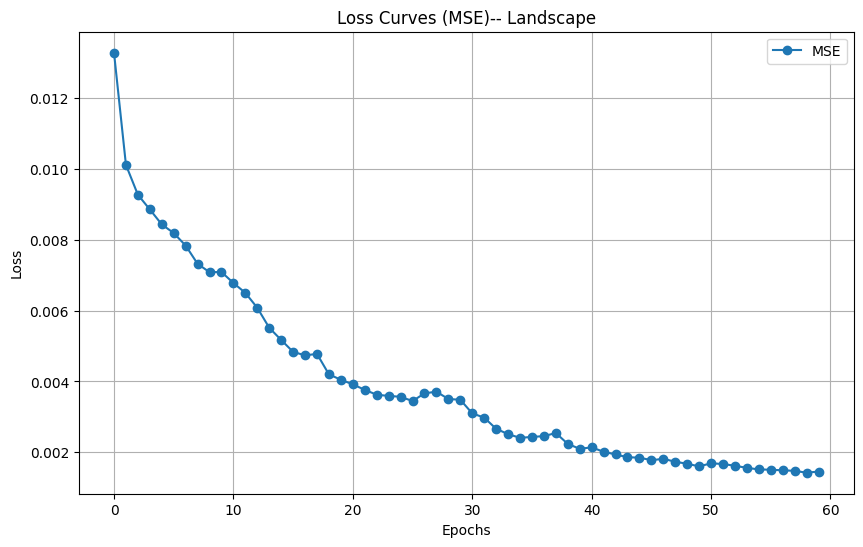

In [123]:
loss = torch.load('land_mse_60_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='MSE', linestyle='-', marker='o')
plt.title('Loss Curves (MSE)-- Landscape')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

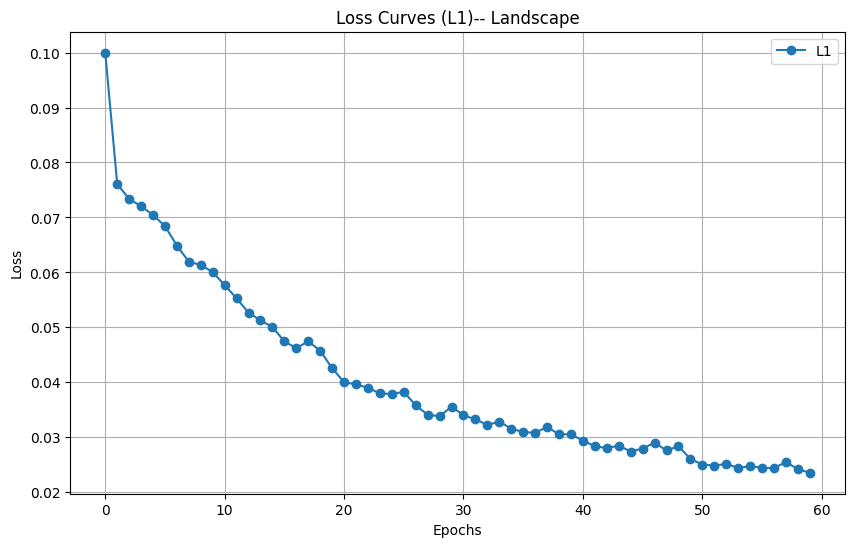

In [125]:
loss = torch.load('land_l1_60_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='L1', linestyle='-', marker='o')
plt.title('Loss Curves (L1)-- Landscape')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

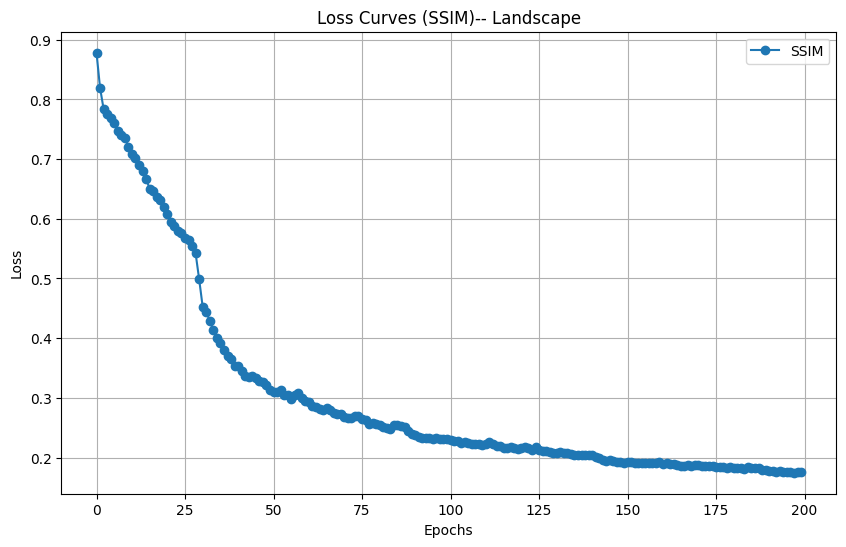

In [122]:
loss = torch.load('land_ssim_200_losses.pth')
plt.figure(figsize=(10, 6))
plt.plot(loss, label='SSIM', linestyle='-', marker='o')
plt.title('Loss Curves (SSIM)-- Landscape')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.grid(True)
plt.show()

In [141]:
ImagePath = 'flower/'
test_list = os.listdir(ImagePath)[:500]

flower_mse = ColorizationResNet()
flower_mse.load_state_dict(torch.load('flower_mse_60.pth'))
flower_mse.eval()

flower_l1 = ColorizationResNet()
flower_l1.load_state_dict(torch.load('flower_l1_60.pth'))
flower_l1.eval()

flower_ssim = ColorizationResNet()
flower_ssim.load_state_dict(torch.load('flower_ssim_200.pth'))
flower_ssim.eval()

ColorizationResNet(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [143]:
ImagePath = 'aniF/'
test_list = os.listdir(ImagePath)[-500:]

aF_mse = ColorizationResNet()
aF_mse.load_state_dict(torch.load('aniF_mse_60.pth'))
aF_mse.eval()

aF_l1 = ColorizationResNet()
aF_l1.load_state_dict(torch.load('aniF_l1_60.pth'))
aF_l1.eval()

aF_ssim = ColorizationResNet()
aF_ssim.load_state_dict(torch.load('aniF_ssim_200.pth'))
aF_ssim.eval()

ColorizationResNet(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [147]:
ImagePath = 'landscape/'
test_list = os.listdir(ImagePath)[-500:]

land_mse = ColorizationResNet()
land_mse.load_state_dict(torch.load('land_mse_60.pth'))
land_mse.eval()

land_l1 = ColorizationResNet()
land_l1.load_state_dict(torch.load('land_l1_60.pth'))
land_l1.eval()

land_ssim = ColorizationResNet()
land_ssim.load_state_dict(torch.load('land_ssim_200.pth'))
land_ssim.eval()

ColorizationResNet(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [134]:
# flowerMSE with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = flower_mse(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.0356366251768634
0.12809847199090946
0.17561202740669252


In [135]:
# flowerL1 with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = flower_l1(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.035209219101508635
0.1263648256215019
0.17226229310035707


In [142]:
# flowerSSIM with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = flower_ssim(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.0391212105796273
0.13284794551329945
0.19134856176376341


In [144]:
# aFMSE with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = aF_mse(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.007446949441248856
0.05843972612402657
0.13575957238674163


In [145]:
# aFMSE with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = aF_l1(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.007413585827493815
0.05640096528265835
0.13478798580169676


In [146]:
# aFssim with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = aF_ssim(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.0026116137325090986
0.024144351261628515
0.0971712064743042


In [148]:
# landMSE with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = land_mse(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.0070958693254917155
0.05741249667730008
0.05947759985923767


In [149]:
# landL1 with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = land_l1(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.007093156410574468
0.05690022350521699
0.05845568549633026


In [150]:
# landSSIM with loss MSE, L1, SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

total_mse_loss = 0.0
total_l1_loss = 0.0
total_ssim_loss = 0.0
mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()
with torch.no_grad():
    for i in test_list:
        img_rgb_orig = io.imread(ImagePath + i)
        img_rgb_res = transform.resize(img_rgb_orig, (256, 256), anti_aliasing=True)
        img_lab_res = color.rgb2lab(img_rgb_res)

        l_res = torch.tensor(img_lab_res[:, :, 0] / 100.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 256, 256)
        output = land_ssim(l_res)
        ab_res = img_lab_res[:, :, 1:]# (256, 256, 2)

        mseloss = np.mean((output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0))**2)  # average MSE over pixels and channels
        l1loss = np.mean(np.abs(output.squeeze(0).permute(1, 2, 0).cpu().numpy()-(ab_res/128.0)))
        ssim_loss = 1 - ssim_metric((output+1.0)/2.0, torch.tensor((ab_res+128.0)/255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0))
        total_mse_loss += mseloss
        total_l1_loss += l1loss
        total_ssim_loss += ssim_loss.item()

avg_mse_loss = total_mse_loss / len(test_list) 
avg_l1_loss = total_l1_loss / len(test_list)
avg_ssim_loss = total_ssim_loss / len(test_list)
print(avg_mse_loss)
print(avg_l1_loss)
print(avg_ssim_loss)

0.008010660021196572
0.060240818249173794
0.06575507879257202
